<a href="https://colab.research.google.com/github/ebolofis/AngularRouting/blob/master/CAM_DS_C201_Mini_project_6_3_P3_24_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




# Stage 1 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [17]:
#Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [18]:
#Cell 2: Load the Stage 1 Dataset
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

try:
    df_stage1 = pd.read_csv(file_url)
    print("Stage 1 data loaded successfully!")
    print(f"Dataset shape: {df_stage1.shape}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("You might need to download the file manually or use a different method to load it from Google Drive.")


Stage 1 data loaded successfully!
Dataset shape: (25059, 16)


In [19]:
#Cell 3 Initial Data Inspection
# Display the first few rows
print("First 5 rows of the dataset:")
display(df_stage1.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df_stage1.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df_stage1.describe(include='all'))

First 5 rows of the dataset:


,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  Pr

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
count,25059,2.505900e+04,25059,25059,7595,25059,25059,25059,8925,21611,25059,25059,25059,25059,24184,25059
unique,19,NaN,2,7,11,4705,2,151,2448,5881,4,172,2,2,2616,40
top,ISC_Sheffield,NaN,Agent,Standard Agent Booking,Bursary,1/1/2002,Male,Chinese,Punjab,Sylhet,Foundation,Pre-Masters Business; Social Sciences and Huma...,False,Yes,BSc (Hons) Computer Science,University of Sheffield International College
freq,5877,NaN,21878,20284,3561,37,15655,9042,865,675,14666,1682,22035,21305,998,5877
mean,NaN,2.606594e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.798838e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.139267e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.538411e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.607941e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.665460e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Cell 4: Remove 'LearnerCode' column
# Make a copy to preserve the original df_stage1 if you want to re-run cells without reloading
df_processed_stage1 = df_stage1.copy()

learner_code_column = 'LearnerCode' # Or the exact name if different

if learner_code_column in df_processed_stage1.columns:
    df_processed_stage1.drop(columns=[learner_code_column], inplace=True)
    print(f"Column '{learner_code_column}' removed successfully.")
else:
    print(f"Column '{learner_code_column}' not found in the dataset.")

print(f"Shape after attempting to remove LearnerCode: {df_processed_stage1.shape}")

Column 'LearnerCode' removed successfully.
Shape after attempting to remove LearnerCode: (25059, 15)


In [23]:
# --- Cell 4.5: Convert DateofBirth to datetime objects ---
if 'df_processed_stage1' in locals() and 'DateofBirth' in df_processed_stage1.columns:
    print("Attempting to convert 'DateofBirth' to datetime...")
    # Attempt conversion, trying to infer format.
    # If there are multiple formats or unparseable dates, errors='coerce' will turn them into NaT (Not a Time)
    df_processed_stage1['DateofBirth'] = pd.to_datetime(df_processed_stage1['DateofBirth'], errors='coerce')

    # Check how many values could not be parsed (are NaT)
    num_nat = df_processed_stage1['DateofBirth'].isnull().sum()

    if num_nat > 0:
        print(f"WARNING: Could not parse {num_nat} entries in 'DateofBirth'. They have been set to NaT (Not a Time).")
        print("You might need to investigate these unparseable date entries if the count is high.")

    print("'DateofBirth' column dtype after conversion attempt:", df_processed_stage1['DateofBirth'].dtype)
    print("Number of unique datetime objects in DateofBirth:", df_processed_stage1['DateofBirth'].nunique())
    # Display some non-null DateofBirth values to check format
    print("\nSample of 'DateofBirth' after conversion (first 5 non-null):")
    print(df_processed_stage1['DateofBirth'].dropna().head())
else:
    print("ERROR: 'df_processed_stage1' not found or 'DateofBirth' column is missing. Please check previous steps.")

Attempting to convert 'DateofBirth' to datetime...
'DateofBirth' column dtype after conversion attempt: datetime64[ns]
Number of unique datetime objects in DateofBirth: 4705

Sample of 'DateofBirth' after conversion (first 5 non-null):
0   1998-01-13
1   1998-02-12
2   2000-04-07
3   1999-05-18
4   1996-04-19
Name: DateofBirth, dtype: datetime64[ns]


<ipython-input-23-4fa29ea51fe8>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_processed_stage1['DateofBirth'] = pd.to_datetime(df_processed_stage1['DateofBirth'], errors='coerce')


In [24]:
# --- Cell 5: Remove columns with high cardinality ---
high_cardinality_threshold = 200
# Ensure df_processed_stage1 is the one with 15 columns
if 'df_processed_stage1' not in locals() or df_processed_stage1.shape[1] != 15:
    print("ERROR: df_processed_stage1 does not seem to be in the correct state (15 columns expected).")
    print("Please ensure Cell 4 (LearnerCode removal) has been run and df_processed_stage1 is updated.")
else:
    cols_before_cell5_execution = list(df_processed_stage1.columns)

    print(f"--- High Cardinality Check (Threshold: >{high_cardinality_threshold} unique values) ---")
    print(f"Number of columns before this check: {len(cols_before_cell5_execution)}")

    object_cols_to_drop_hc = []
    numeric_cols_high_cardinality_for_review = []

    for col in df_processed_stage1.columns:
        num_unique = df_processed_stage1[col].nunique()
        if num_unique > high_cardinality_threshold:
            # Check if the target variable 'CompletedCourse' is accidentally flagged
            # (Assuming 'CompletedCourse' is the target and should not be dropped here)
            if col == 'CompletedCourse': # Replace 'CompletedCourse' if your target variable name is different
                print(f"INFO: Target column '{col}' has {num_unique} unique values, but will be skipped for removal.")
                continue

            if df_processed_stage1[col].dtype == 'object':
                print(f"INFO: Object column '{col}' (dtype: {df_processed_stage1[col].dtype}) has {num_unique} unique values. Marked for automatic removal.")
                object_cols_to_drop_hc.append(col)
            else:
                print(f"INFO: Numerical column '{col}' (dtype: {df_processed_stage1[col].dtype}) has {num_unique} unique values. (Flagged for review - NOT automatically dropped by this script section).")
                numeric_cols_high_cardinality_for_review.append(col)

    # Step 1: Automatically drop identified high-cardinality OBJECT columns
    if object_cols_to_drop_hc:
        df_processed_stage1.drop(columns=object_cols_to_drop_hc, inplace=True)
        print(f"\nACTION: Automatically removed high cardinality OBJECT columns: {object_cols_to_drop_hc}")
    else:
        print("\nINFO: No OBJECT columns found exceeding the high cardinality threshold for automatic removal.")

    # Step 2: Review and decide on NUMERICAL high-cardinality columns
    print(f"\nREVIEW: Numerical columns identified with >{high_cardinality_threshold} unique values: {numeric_cols_high_cardinality_for_review}")
    if not numeric_cols_high_cardinality_for_review:
        print("INFO: No numerical columns found with high cardinality for review.")
    else:
        print("IMPORTANT: The script HAS NOT automatically dropped these numerical columns.")
        print("If any of these numerical columns are identifiers and you want to drop them,")
        print("you would need to add a line of code to do so. For example:")
        print("# df_processed_stage1.drop(columns=['NameOfNumericalColumnToDrop'], inplace=True, errors='ignore')")

    cols_after_cell5_execution = list(df_processed_stage1.columns)
    dropped_in_this_run = [col for col in cols_before_cell5_execution if col not in cols_after_cell5_execution]

    print(f"\n--- Summary of Cardinality Check (Cell 5) ---")
    if dropped_in_this_run:
        print(f"Columns dropped in THIS run of Cell 5: {dropped_in_this_run} (Total: {len(dropped_in_this_run)})")
    else:
        print("No columns were dropped by the automatic logic in THIS run of Cell 5.")

    print(f"Current shape of df_processed_stage1: {df_processed_stage1.shape}")
    print(f"Current columns in df_processed_stage1: {list(df_processed_stage1.columns)}")

--- High Cardinality Check (Threshold: >200 unique values) ---
Number of columns before this check: 15
INFO: Numerical column 'DateofBirth' (dtype: datetime64[ns]) has 4705 unique values. (Flagged for review - NOT automatically dropped by this script section).
INFO: Object column 'HomeState' (dtype: object) has 2448 unique values. Marked for automatic removal.
INFO: Object column 'HomeCity' (dtype: object) has 5881 unique values. Marked for automatic removal.
INFO: Object column 'ProgressionDegree' (dtype: object) has 2616 unique values. Marked for automatic removal.

ACTION: Automatically removed high cardinality OBJECT columns: ['HomeState', 'HomeCity', 'ProgressionDegree']

REVIEW: Numerical columns identified with >200 unique values: ['DateofBirth']
IMPORTANT: The script HAS NOT automatically dropped these numerical columns.
If any of these numerical columns are identifiers and you want to drop them,
you would need to add a line of code to do so. For example:
# df_processed_stage1.

In [25]:
# --- Cell 6: Remove columns with > 50% missing data ---
if 'df_processed_stage1' in locals():
    # Ensure df_processed_stage1 is available
    cols_before_cell6_execution = list(df_processed_stage1.columns)
    print(f"\n\n--- Missing Data Check (Threshold: >50% missing) ---")
    print(f"Number of columns before this check: {len(cols_before_cell6_execution)}")

    missing_data_threshold = 0.50 # 50%
    columns_to_drop_missing = []

    missing_percentages = df_processed_stage1.isnull().sum() / len(df_processed_stage1) # .mean() also works
    print("\nPercentage of missing values per column (showing only those with missing values):")
    # Display sorted percentages for columns that have any missing values
    current_missing_summary = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
    if not current_missing_summary.empty:
        print(current_missing_summary)
    else:
        print("No columns currently have any missing values.")


    for col, percentage in missing_percentages.items():
        if percentage > missing_data_threshold:
            # Ensure we don't accidentally drop the target variable if it has missing values
            # (though >50% missing in target is a different problem)
            # Assuming 'CompletedCourse' is your target variable
            if col == 'CompletedCourse':
                 print(f"INFO: Target column '{col}' has {percentage*100:.2f}% missing values, but will be skipped for removal by this rule (if >50% missing).")
                 # We typically wouldn't drop a target column, but if it had >50% missing, that's a major data issue.
                 # For now, this rule won't drop it.
                 continue # Skip target column from this specific >50% drop rule

            print(f"INFO: Column '{col}' has {percentage*100:.2f}% missing values. Marking for removal.")
            columns_to_drop_missing.append(col)

    if columns_to_drop_missing:
        df_processed_stage1.drop(columns=columns_to_drop_missing, inplace=True)
        print(f"\nACTION: Removed columns with >{missing_data_threshold*100}% missing data: {columns_to_drop_missing}")
    else:
        print("\nINFO: No columns found exceeding the missing data threshold for removal.")

    cols_after_cell6_execution = list(df_processed_stage1.columns)
    dropped_in_this_run_cell6 = [col for col in cols_before_cell6_execution if col not in cols_after_cell6_execution]

    print(f"\n--- Summary of Missing Data Check (Cell 6) ---")
    if dropped_in_this_run_cell6:
        print(f"Columns dropped in THIS run of Cell 6: {dropped_in_this_run_cell6} (Total: {len(dropped_in_this_run_cell6)})")
    else:
        print("No columns were dropped by the automatic logic in THIS run of Cell 6.")

    print(f"Current shape of df_processed_stage1: {df_processed_stage1.shape}")
    print(f"Current columns in df_processed_stage1: {list(df_processed_stage1.columns)}")

    print("\nFinal check of missing values after all removals in Cell 6:")
    remaining_missing = df_processed_stage1.isnull().sum()
    final_missing_summary = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
    if not final_missing_summary.empty:
        print(final_missing_summary)
    else:
        print("No missing values remaining in the dataset (or all columns with missing data were below the 50% threshold or were the target).")

else:
    print("ERROR: df_processed_stage1 is not defined. Please ensure previous cells ran correctly.")



--- Missing Data Check (Threshold: >50% missing) ---
Number of columns before this check: 12

Percentage of missing values per column (showing only those with missing values):
DiscountType    0.696915
dtype: float64
INFO: Column 'DiscountType' has 69.69% missing values. Marking for removal.

ACTION: Removed columns with >50.0% missing data: ['DiscountType']

--- Summary of Missing Data Check (Cell 6) ---
Columns dropped in THIS run of Cell 6: ['DiscountType'] (Total: 1)
Current shape of df_processed_stage1: (25059, 11)
Current columns in df_processed_stage1: ['CentreName', 'BookingType', 'LeadSource', 'DateofBirth', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity']

Final check of missing values after all removals in Cell 6:
No missing values remaining in the dataset (or all columns with missing data were below the 50% threshold or were the target).


Summary
Stage 1:

Initial 16 columns
Cell 4: Removed LearnerCode (15 columns remaining).
Cell 4.5: Converted DateofBirth to datetime format.
Cell 5: Removed high cardinality object columns (HomeState, HomeCity, ProgressionDegree) (12 columns remaining, DateofBirth preserved).
Cell 6: Removed column with >50% missing data (DiscountType) (11 columns remaining).
Your df_processed_stage1 DataFrame now has 11 columns:
['CentreName', 'BookingType', 'LeadSource', 'DateofBirth', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity']

In [26]:
# --- Cell 7: Feature Engineering - Calculate 'Age' from DateofBirth ---
from datetime import datetime

if 'df_processed_stage1' in locals() and 'DateofBirth' in df_processed_stage1.columns:
    if pd.api.types.is_datetime64_any_dtype(df_processed_stage1['DateofBirth']):
        # Calculate Age as of today
        today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d')) # Use pd.to_datetime for consistency
        df_processed_stage1['Age'] = (today - df_processed_stage1['DateofBirth']).dt.days // 365.25
        df_processed_stage1['Age'] = df_processed_stage1['Age'].astype(int) # Convert to integer age

        print("Feature 'Age' created successfully.")
        print(df_processed_stage1[['DateofBirth', 'Age']].head())

        #  Drop the original DateofBirth column
        drop_dob = True # Set to False if you want to keep DateofBirth for now
        if drop_dob:
              df_processed_stage1.drop(columns=['DateofBirth'], inplace=True)
              print("\n'DateofBirth' column dropped.")
              print(f"Current columns: {list(df_processed_stage1.columns)}")
        else:
              print("\n'DateofBirth' column kept.")

    else:
        print("ERROR: 'DateofBirth' column is not in datetime format. Please check Cell 4.5.")
else:
    print("ERROR: 'df_processed_stage1' not found or 'DateofBirth' column is missing.")

Feature 'Age' created successfully.
  DateofBirth  Age
0  1998-01-13   27
1  1998-02-12   27
2  2000-04-07   25
3  1999-05-18   26
4  1996-04-19   29

'DateofBirth' column dropped.
Current columns: ['CentreName', 'BookingType', 'LeadSource', 'Gender', 'Nationality', 'CourseLevel', 'CourseName', 'IsFirstIntake', 'CompletedCourse', 'ProgressionUniversity', 'Age']


In [29]:
# --- Cell 8: Feature Engineering - Convert Target Variable to Binary (Continued) ---
target_column = 'CompletedCourse' # Confirm this is your target variable

if 'df_processed_stage1' in locals() and target_column in df_processed_stage1.columns:
    print(f"Unique values in the target column '{target_column}' before conversion:")
    print(df_processed_stage1[target_column].value_counts(dropna=False))

    # Define the mapping based on your values:
    # 'No' (dropout) will be 1
    # 'Yes' (completed) will be 0
    mapping = {'No': 1, 'Yes': 0}

    # Apply the mapping
    df_processed_stage1[target_column] = df_processed_stage1[target_column].map(mapping)

    # Verify the conversion
    print(f"\nTarget column '{target_column}' after conversion to binary:")
    print(df_processed_stage1[target_column].value_counts(dropna=False))

    # Check data type
    print(f"\nData type of '{target_column}' after mapping: {df_processed_stage1[target_column].dtype}")

    # Check for any NaNs introduced by mapping (should not happen if all values were 'Yes' or 'No')
    if df_processed_stage1[target_column].isnull().any():
        print(f"\nWARNING: NaNs present in '{target_column}' after mapping. This means some original values were not 'Yes' or 'No'.")
        print(f"Number of NaNs: {df_processed_stage1[target_column].isnull().sum()}")
    else:
        print(f"\nNo NaNs introduced in '{target_column}' by mapping.")

else:
    print(f"ERROR: 'df_processed_stage1' not found or target column '{target_column}' is missing.")

Unique values in the target column 'CompletedCourse' before conversion:
CompletedCourse
Yes    21305
No      3754
Name: count, dtype: int64

Target column 'CompletedCourse' after conversion to binary:
CompletedCourse
0    21305
1     3754
Name: count, dtype: int64

Data type of 'CompletedCourse' after mapping: int64

No NaNs introduced in 'CompletedCourse' by mapping.


Value counts for the target variable 'CompletedCourse':
CompletedCourse
0    21305
1     3754
Name: count, dtype: int64

Percentage distribution for 'CompletedCourse':
CompletedCourse
0    85.019354
1    14.980646
Name: proportion, dtype: float64


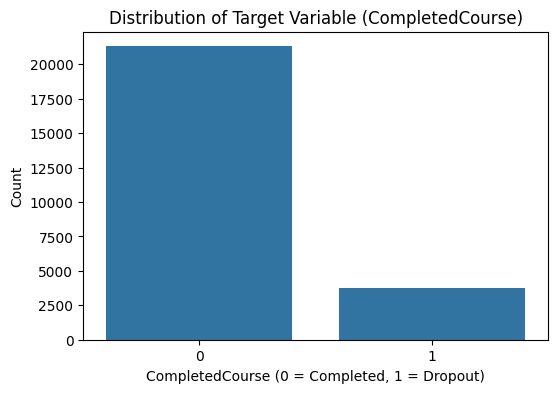


Majority class count: 21305
Minority class count: 3754
Ratio of majority to minority class: 5.68:1
The data is considered imbalanced.


In [30]:
# --- Cell 9: Plot Target Variable Histogram and Assess Imbalance ---


target_column = 'CompletedCourse'

if 'df_processed_stage1' in locals() and target_column in df_processed_stage1.columns:
    print(f"Value counts for the target variable '{target_column}':")
    print(df_processed_stage1[target_column].value_counts())

    print(f"\nPercentage distribution for '{target_column}':")
    print(df_processed_stage1[target_column].value_counts(normalize=True) * 100)

    # Plotting the histogram/countplot
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_column, data=df_processed_stage1)
    plt.title(f'Distribution of Target Variable ({target_column})')
    plt.xlabel(f'{target_column} (0 = Completed, 1 = Dropout)')
    plt.ylabel('Count')
    plt.xticks([0, 1]) # Ensure ticks are at 0 and 1
    plt.show()

    # Assess imbalance
    count_class_0 = df_processed_stage1[target_column].value_counts().get(0, 0)
    count_class_1 = df_processed_stage1[target_column].value_counts().get(1, 0)

    if count_class_0 == 0 or count_class_1 == 0:
        print("\nOne of the classes has zero samples!")
    else:
        majority_class_count = max(count_class_0, count_class_1)
        minority_class_count = min(count_class_0, count_class_1)
        ratio = majority_class_count / minority_class_count
        print(f"\nMajority class count: {majority_class_count}")
        print(f"Minority class count: {minority_class_count}")
        print(f"Ratio of majority to minority class: {ratio:.2f}:1")

        if ratio > 3: # A common threshold for imbalance, can be adjusted
            print("The data is considered imbalanced.")
        elif ratio > 1.5:
            print("The data has a slight imbalance.")
        else:
            print("The data is relatively balanced.")
else:
    print(f"ERROR: 'df_processed_stage1' not found or target column '{target_column}' is missing.")

# Stage 2 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
# Start coding from here with Stage 2 dataset

# Stage 3 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [ ]:
# Start coding from here with Stage 3 dataset

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
